In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
import logging

In [17]:
SERVERFOLDER = r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle'
EXPORTFOLDER = os.path.join(cfg.path.fig, 'conicalNozzle', 'plots')
TOPFOLDERS = [os.path.join(SERVERFOLDER, s) for s in ['orig', 'horizontal', 'speed_sweep', 'standard_box']]

# Generating Files

In [142]:
import pandas as pd
o = []
for topfolder in [SERVERFOLDER]:
    for f in fp.caseFolders(topfolder):
        fs.populate(f)
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\legend_mesh.csv')

In [5]:
import pandas as pd
o = []
for topfolder in [r'C:\Users\lmf1\Documents\OpenFOAM\conical']:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_speed_rhe_angle.csv'))

In [34]:
import pandas as pd
o = []
for topfolder in [SERVERFOLDER]:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_general.csv'))

In [33]:
for topfolder in [SERVERFOLDER]:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

INFO:root:\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn0hor
INFO:root:No slices recorded in \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn0hor
INFO:root:\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101
INFO:root:    Exported \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101\sliceSummaries.csv
INFO:root:    Exported \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101\steadyTimes.csv
INFO:root:    Exported \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn101\steadyPositions.csv
INFO:root:\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\cn102
INFO:root:No slices recorded

# Plots

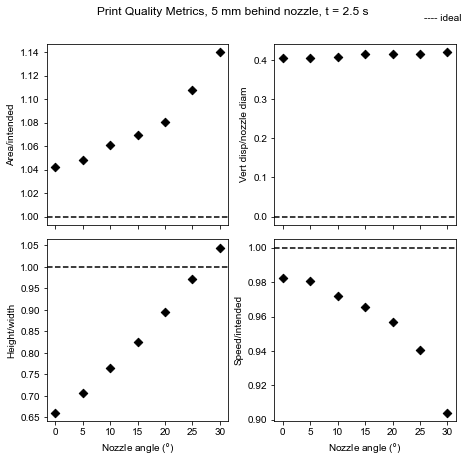

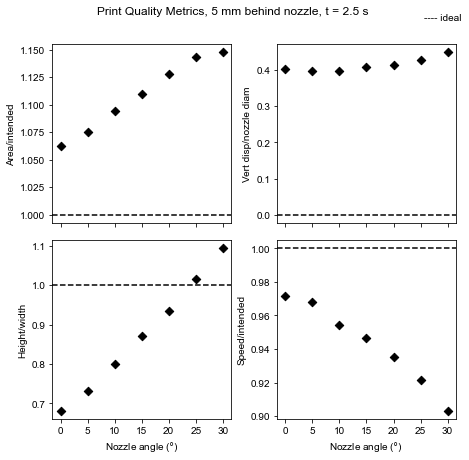

In [32]:
time = 2.5
x = 5
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
for TOPFOLDER in [TOPFOLDERS[0], TOPFOLDERS[3]]:
    qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels, overwrite=True)

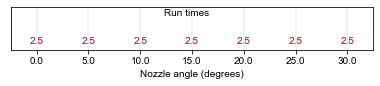

In [33]:
xvar = 'nozzleAngle'
yvar = 'nuink'
for TOPFOLDER in [TOPFOLDERS[0], TOPFOLDERS[3]]:
    txtPlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
    timePlots(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
    runtimePlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)

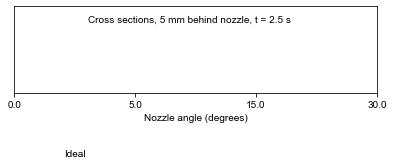

In [36]:
t = 2.5
xposition = 5
xvar = 'nozzleAngle'
yvar = 'nuink'
x = [0,5,10,15,20,25,30]
y = []
sigma = [0]
for TOPFOLDER in [TOPFOLDERS[0], TOPFOLDERS[3], TOPFOLDERS[1]]:
    XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, sigma, xvar=xvar, yvar=yvar, nozzleAnglelist=x, nulist=y, overwrite=True, adjustBounds=True)

In [38]:
t = 2.5
xvar = 'nozzleAngle'
yvar = 'nuink'
x = [0,5,10,15,20,25,30]
y = []
sigma = 0
TOPFOLDER = TOPFOLDERS[0]
# for ta in ['y_viscy', 'x_viscx', 'y_uslicey', 'x_uslicex', 'y_shearStressy', 'x_shearStressx']:
for TOPFOLDER in [TOPFOLDERS[0], TOPFOLDERS[3], TOPFOLDERS[1]]:
    for ta in ['y_viscy', 'x_viscx']:
        picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=True, nozzleAnglelist=x, nulist=y, adjustBounds=False)

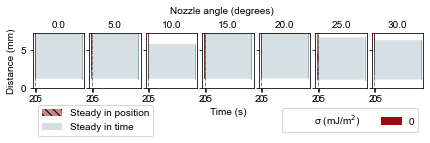

In [21]:
xvar = 'nozzleAngle'
yvar = 'nuink'
x = [0,5,10,15,20,25,30]
y = []
sigma = 0
imsize=1
TOPFOLDER = TOPFOLDERS[0]
steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar=xvar, yvar=yvar, overwrite=True, nozzleAnglelist=x, nulist=y, adjustBounds=False)

In [22]:
TOPFOLDER = TOPFOLDERS[0]
shearStressPlots0(TOPFOLDER, EXPORTFOLDER, 2.5, overwrite=True)

KeyError: 'shearstressmag'